In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline




In [3]:
# Load the CSV file into a DataFrame
merged_data = pd.read_csv("parks_busyness_weather.csv")

merged_data


C:\Users\adi17\AppData\Local\Temp\ipykernel_25432\398327693.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_data = pd.read_csv("parks_busyness_weather.csv")


,park_id,park_name,park_area,year,month,day,hour,day_of_week,weekend,season,...,taxi_zone_ids,taxi_zones,geometry,datetime,dt_iso,temp,temp_min,temp_max,rain_1h,rain_3h
0,PK101,Inwood Hill Park,784904.717278,2022,1,1,11,5,1,4,...,243,Washington Heights North,"POLYGON ((-73.9320015 40.86963009999998, -73.9...",2022-01-01 11:00:00,2022-01-01 11:00:00,10.21,9.22,11.00,0.25,0.0
1,PK101,Inwood Hill Park,784904.717278,2022,1,1,17,5,1,4,...,243,Washington Heights North,"POLYGON ((-73.9320015 40.86963009999998, -73.9...",2022-01-01 17:00:00,2022-01-01 17:00:00,12.12,11.47,12.78,0.38,0.0
2,PK101,Inwood Hill Park,784904.717278,2022,1,1,19,5,1,4,...,243,Washington Heights North,"POLYGON ((-73.9320015 40.86963009999998, -73.9...",2022-01-01 19:00:00,2022-01-01 19:00:00,12.16,11.45,12.81,0.25,0.0
3,PK101,Inwood Hill Park,784904.717278,2022,1,10,12,0,0,4,...,243,Washington Heights North,"POLYGON ((-73.9320015 40.86963009999998, -73.9...",2022-01-10 12:00:00,2022-01-10 12:00:00,-1.61,-2.21,-0.78,0.00,0.0
4,PK101,Inwood Hill Park,784904.717278,2022,1,10,13,0,0,4,...,243,Washington Heights North,"POLYGON ((-73.9320015 40.86963009999998, -73.9...",2022-01-10 13:00:00,2022-01-10 13:00:00,-1.88,-3.21,-1.22,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336360,PK99,Hudson River Park,44860.653005,2022,9,9,18,4,0,2,...,"13, 231, 125","Battery Park City, TriBeCa/Civic Center, Hudso...","POLYGON ((-74.0157807 40.7212929, -74.0157779 ...",2022-09-09 18:00:00,2022-09-09 18:00:00,25.56,24.34,26.45,0.00,0.0
336361,PK99,Hudson River Park,44860.653005,2022,9,9,19,4,0,2,...,"13, 231, 125","Battery Park City, TriBeCa/Civic Center, Hudso...","POLYGON ((-74.0157807 40.7212929, -74.0157779 ...",2022-09-09 19:00:00,2022-09-09 19:00:00,25.66,24.22,27.00,0.00,0.0
336362,PK99,Hudson River Park,44860.653005,2022,9,9,20,4,0,2,...,"13, 231, 125","Battery Park City, TriBeCa/Civic Center, Hudso...","POLYGON ((-74.0157807 40.7212929, -74.0157779 ...",2022-09-09 20:00:00,2022-09-09 20:00:00,25.87,24.78,27.23,0.00,0.0
336363,PK99,Hudson River Park,44860.653005,2022,9,9,8,4,0,2,...,"13, 231, 125","Battery Park City, TriBeCa/Civic Center, Hudso...","POLYGON ((-74.0157807 40.7212929, -74.0157779 ...",2022-09-09 08:00:00,2022-09-09 08:00:00,18.44,16.79,19.79,0.00,0.0


features and the target variable

In [4]:

features = ['month', 'day', 'hour', 'day_of_week', 'weekend', 'season', 'isHoliday?', 'rain_1h', 'rain_3h','park_id']
target = 'park_busyness'

Handling categorical data 

In [5]:
# Handling categorical data with OneHotEncoder
categorical_features = ['month', 'day', 'hour', 'day_of_week', 'weekend', 'season', 'isHoliday?']
numerical_features = ['rain_1h', 'rain_3h']

transformer for preprocessing

In [6]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])




## LINEAR REGRESSION

modeling pipeline

In [7]:

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

Split data into training and test sets

In [8]:
# Separate 'park_id' and ensure it doesn't get used in training
X = merged_data[features].drop('park_id', axis=1)
y = merged_data[target]
X_train, X_test, y_train, y_test, ids_train, ids_test = train_test_split(X, y, merged_data['park_id'], test_size=0.2, random_state=42)


 Fit the pipeline


In [9]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['rain_1h', 'rain_3h']),
                                                 ('cat', OneHotEncoder(),
                                                  ['month', 'day', 'hour',
                                                   'day_of_week', 'weekend',
                                                   'season', 'isHoliday?'])])),
                ('regressor', LinearRegression())])

Make predictions


In [10]:
y_pred = pipeline.predict(X_test)


Combine IDs with predictions for tracking

In [11]:
predictions_with_ids = pd.DataFrame({'park_id': ids_test, 'actual_busyness': y_test, 'predicted_busyness': y_pred})

# Display combined results
print(predictions_with_ids.head())

       park_id  actual_busyness  predicted_busyness
1720     PK102         0.053389            0.457428
247064    PK47         0.193755            0.449197
333535    PK98         0.011113            0.494400
329458    PK96         0.004126            0.484606
33837    PK122         0.010101            0.465978


### Evaluate Linear Regression

In [12]:

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)

In [13]:
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adjusted_r2}")

MAE: 0.6066839761751163
MSE: 5.932738211966293
RMSE: 2.4357212919310562
R-squared: 0.00025583473801527035
Adjusted R-squared: 0.0002290841397266652


MAE of 0.606  means that around 0.606 units off from the actual values.

RMSE OF 2.435 is significant and 2.435 units off from the actual value isn't a great indicator

R-squared of 0.0002 is extremely close to zero, thus the models does not explain the  variability of the data around its mean.

Thats the same for Adjust R-squared

Actual vs Predicted Values

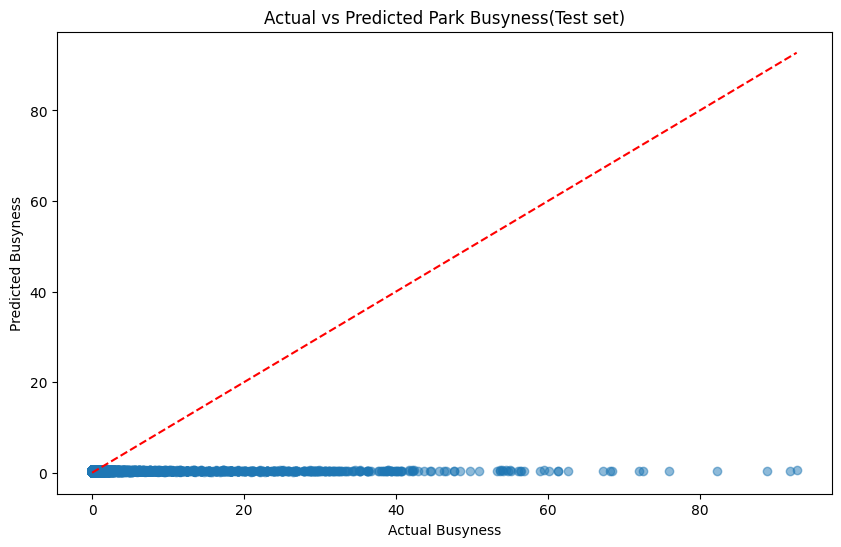

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line for perfect predictions
plt.xlabel('Actual Busyness')
plt.ylabel('Predicted Busyness')
plt.title('Actual vs Predicted Park Busyness(Test set)')
plt.show()


Most predicted values are clustered near zero regardless of the actual values, which suggests that the model fails to capture the variance in the data. The ideal scenario is for points to lie along the red dashed line, which is not the case here.

Residual Plots

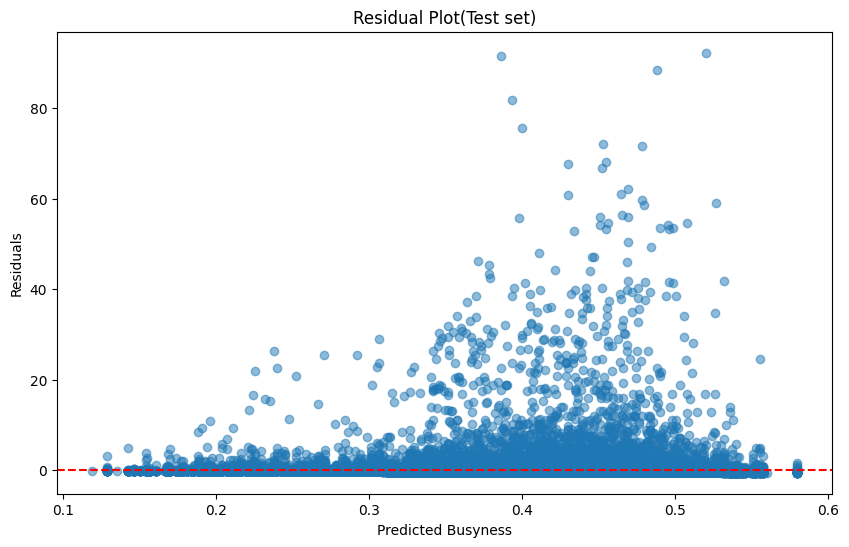

In [15]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Busyness')
plt.ylabel('Residuals')
plt.title('Residual Plot(Test set)')
plt.show()


The residuals should ideally be randomly scattered around the horizontal line (y=0). Instead, they show a pattern: as the predicted value increases, the residuals also increase. This indicates a problem with the model, such as it being too simplistic.

Histogram of Residuals 

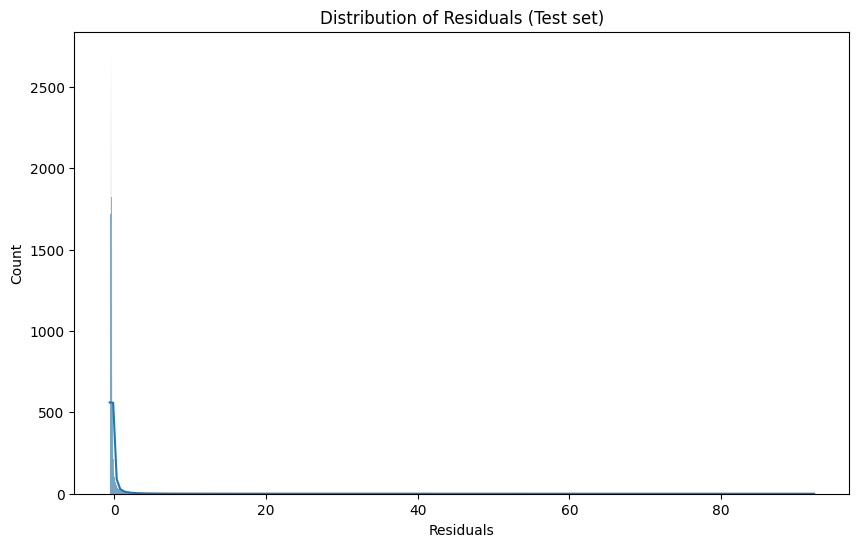

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals (Test set)')
plt.show()


 The histogram shows that residuals are heavily skewed towards smaller errors, but there are some very large errors as well. Most residuals are close to zero, which corroborates with the residual plot showing many values under-predicted

In [17]:
def loss_function(y_true, y_pred):
    """
    Custom loss function that calculates a weighted sum of MSE and MAE with an additional penalty for large errors.
    
    Args:
    y_true (array): True values of the target variable.
    y_pred (array): Predicted values from the model.
    
    Returns:
    float: Computed loss value.
    """
    # Convert inputs to numpy arrays for calculation, in case they aren't already
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Calculate MSE
    mse = np.mean((y_true - y_pred) ** 2)
    
    # Calculate MAE
    mae = np.mean(np.abs(y_true - y_pred))
    
    # Define a threshold for large errors
    large_error_threshold = np.percentile(y_true, 90)  # errors above the 90th percentile of true values
    
    # Calculate extra penalties for large errors
    large_errors = y_true - y_pred
    large_error_penalty = np.mean([error**2 if np.abs(error) > large_error_threshold else 0 for error in large_errors])
    
    # Combine these into a single loss metric
    # We'll weight MSE twice as much as MAE and add the penalty
    custom_loss = 0.5 * mse + 0.25 * mae + 0.25 * large_error_penalty
    
    return custom_loss

# Example of calculating this loss with predictions
custom_loss_value = loss_function(y_test, y_pred)
print(" Loss Value:", custom_loss_value)



 Loss Value: 4.571462193129202


The loss suggests the model has significant room for improvement, especially considering the penalties for large errors.

TESTING ON TRAINING SET - LINEAR REGRESSION 

In [18]:
# Make predictions on the training data
y_train_pred = pipeline.predict(X_train)

# Calculate and print metrics for training data
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

print("Training Data Metrics:")
print("Mean Absolute Error:", mae_train)
print("Mean Squared Error:", mse_train)
print("Root Mean Squared Error:", rmse_train)
print("R-squared:", r2_train)




Training Data Metrics:
Mean Absolute Error: 0.6064652417922933
Mean Squared Error: 5.935883883688461
Root Mean Squared Error: 2.4363669435633994
R-squared: 0.0008201250699706453


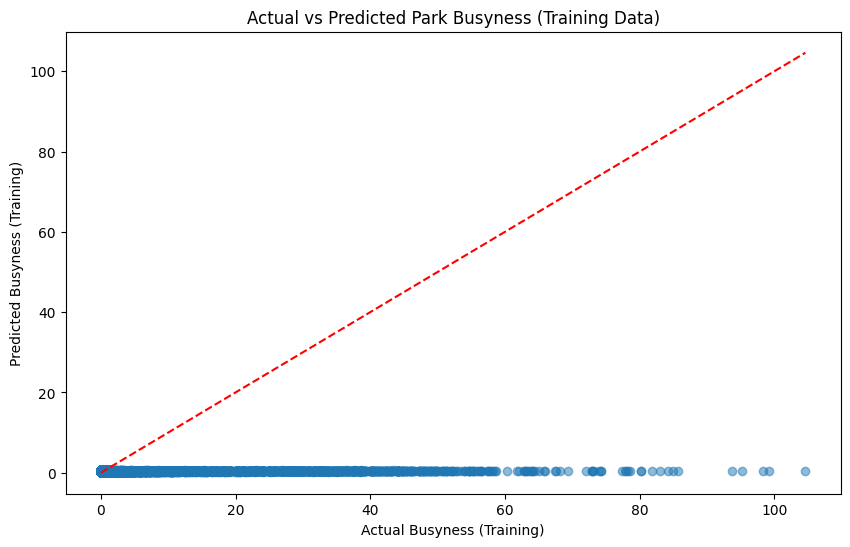

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')  # Ideal scenario line
plt.xlabel('Actual Busyness (Training)')
plt.ylabel('Predicted Busyness (Training)')
plt.title('Actual vs Predicted Park Busyness (Training Data)')
plt.show()


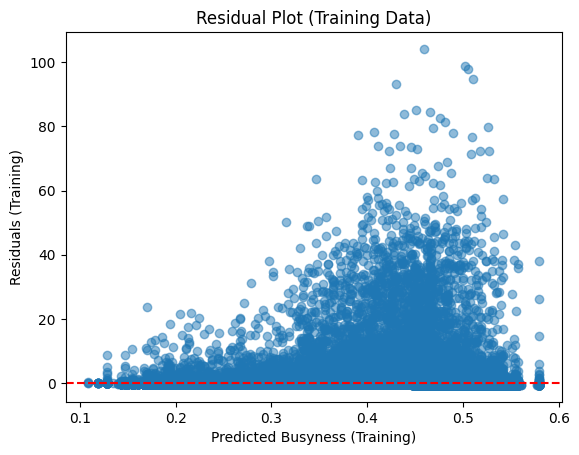

In [20]:
# Residual plot for training data
residuals_train = y_train - y_train_pred
plt.scatter(y_train_pred, residuals_train, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Busyness (Training)')
plt.ylabel('Residuals (Training)')
plt.title('Residual Plot (Training Data)')
plt.show()

In [21]:
# Calculate the custom loss for the training data
y_train_pred = pipeline.predict(X_train)  

custom_loss_train = loss_function(y_train, y_train_pred)

print("Custom Loss on Training Data:", custom_loss_train)


Custom Loss on Training Data: 4.573662005817468


### Metrics Comparison

* **Mean Absolute Error (MAE)** is almost identical for both training (0.6065) and test (0.6067) sets, indicating consistent error for seen and unseen data.
* **Mean Squared Error (MSE)** and **Root Mean Squared Error (RMSE)** are also very close across both datasets, suggesting that the model's prediction error's magnitude and variability are consistent.
* **R-squared** values are extremely low in both cases (0.00082 training and 0.00026 test), thus  the model explains none of the variance in busyness.

### Loss Calculation

* The custom loss values (4.5737 training and 4.5715 test) are very similar, which further suggests that the model performs almost equally poorly on both the training and testing datasets. This points to a fundamental issue with the model's capacity to capture the necessary patterns rather than overfitting or underfitting.

### Analysis

* **Actual vs. Predicted**: Both training and test sets show that the model almost always predicts values close to zero regardless of the actual values. This behavior indicates that the model is too simplistic.
* **Residual Plots**: For both datasets, residuals increase with the predicted values, which shouldn't happen in an ideal model scenario. Ideally, residuals should be randomly scattered around the horizontal axis, with no clear pattern

## Final overview

1. **Model Adequacy**: The linear model, as currently specified, is inadequate for predicting park busyness. The lack of explanatory power (low R-squared), high similarity in errors across training and test sets, and consistent underprediction (predicted values cluster near zero) suggest that either the model form (linear vs. non-linear) or the features used are inappropriate for this task.
2. **Model Complexity**: Considering a more complex model or nonlinear transformations within the current model framework could help. Techniques like polynomial regression, decision trees, or ensemble methods might capture the data's patterns better.

RUNNING THE MODEL

In [22]:
from joblib import dump, load

# Train the pipeline
pipeline.fit(X_train, y_train)

# Save the model to disk
dump(pipeline, 'linear_regression_model.joblib')

# Later or in another script, load the model from disk
loaded_model = load('linear_regression_model.joblib')

# Use the loaded model to make predictions
y_pred = loaded_model.predict(X_test)
